In [9]:
POP_SIZE = 500
TOURNAMENT_SIZE = 2
NUM_GENERATIONS = 1000
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.03
ELITISM_PERCENTAGE = 0.1

NUM_RUNS = 10

from Utils import read_instance, check_solution, initialize_population, generate_next_generation, run_ga
from matplotlib import pyplot as plt

NUM_EXAMS, NUM_TIMESLOTS, NUM_STUDENTS, student_matrix = read_instance("medium_instance.txt")

print("N - Number of Exams:", NUM_EXAMS)
print("K - Number of Timeslots:", NUM_TIMESLOTS)
print("M - Number of Students:", NUM_STUDENTS)

N - Number of Exams: 25
K - Number of Timeslots: 10
M - Number of Students: 60


# **Assignment 1 - Timetabling Problem - Joey Galvin 22348861**

In [10]:
# print("\nMatrix:")
# for i, row in enumerate(student_matrix):
#     print(f"Student{i:2d}: {row}")

initial_population = initialize_population(POP_SIZE, NUM_EXAMS, NUM_TIMESLOTS)
print("\nInitial Population:")
for i, solution in enumerate(initial_population):
    print(f"Solution {i}: {solution}")

fitnesses = [check_solution(solution, student_matrix)[0] for solution in initial_population]

print("\nFitnesses:")
for i, fitness in enumerate(fitnesses):
    print(f"Solution {i}: Fitness = {fitness}")

print("Average Fitness:", sum(fitnesses)/len(fitnesses))


Initial Population:
Solution 0: [2, 0, 6, 0, 0, 4, 8, 4, 6, 8, 5, 4, 0, 5, 9, 5, 6, 1, 5, 4, 6, 0, 4, 4, 0]
Solution 1: [6, 2, 9, 0, 6, 4, 2, 0, 7, 5, 0, 7, 4, 2, 2, 5, 9, 1, 4, 3, 9, 1, 3, 7, 2]
Solution 2: [4, 6, 5, 6, 5, 3, 7, 1, 7, 7, 7, 8, 0, 4, 4, 9, 6, 7, 5, 2, 0, 9, 4, 2, 0]
Solution 3: [1, 6, 4, 2, 5, 9, 6, 8, 0, 0, 7, 2, 9, 0, 7, 8, 6, 6, 5, 3, 7, 4, 8, 8, 6]
Solution 4: [9, 0, 2, 0, 9, 7, 8, 2, 1, 8, 6, 4, 9, 3, 5, 9, 8, 0, 0, 8, 4, 6, 7, 3, 4]
Solution 5: [4, 5, 2, 8, 7, 6, 1, 1, 4, 4, 1, 4, 8, 0, 2, 9, 3, 3, 8, 9, 0, 6, 9, 3, 2]
Solution 6: [9, 2, 3, 1, 9, 5, 0, 3, 9, 5, 2, 5, 4, 0, 1, 3, 8, 5, 6, 3, 9, 1, 8, 7, 0]
Solution 7: [7, 5, 8, 7, 6, 4, 9, 7, 4, 3, 4, 0, 0, 5, 8, 3, 1, 3, 1, 8, 5, 1, 2, 5, 1]
Solution 8: [3, 1, 0, 3, 6, 5, 0, 5, 7, 8, 7, 7, 0, 8, 3, 9, 8, 0, 5, 5, 0, 3, 9, 4, 6]
Solution 9: [9, 9, 0, 6, 4, 4, 9, 4, 9, 8, 6, 4, 5, 0, 2, 1, 0, 5, 5, 8, 7, 4, 1, 7, 7]
Solution 10: [1, 6, 2, 3, 7, 9, 0, 4, 4, 7, 9, 7, 9, 6, 6, 7, 4, 8, 9, 7, 2, 8, 5, 2, 6]
Solution 1

Now That I have got an initial population and their fitnesses, I will being to begin to implement the genetic algorithm. I will be using tournament selection, elitism, one-point crossover, and mutation to evolve the population over multiple generations.

In [11]:
next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, NUM_TIMESLOTS, ELITISM_PERCENTAGE)
fitnesses = [check_solution(solution, student_matrix)[0] for solution in next_gen_population]
print("Average Fitness:", sum(fitnesses)/len(fitnesses))

Average Fitness: 2015.05


Next generation generated and average fitness collected, now need to automate this process over multiple generations and plot the increase in fitness over generations.

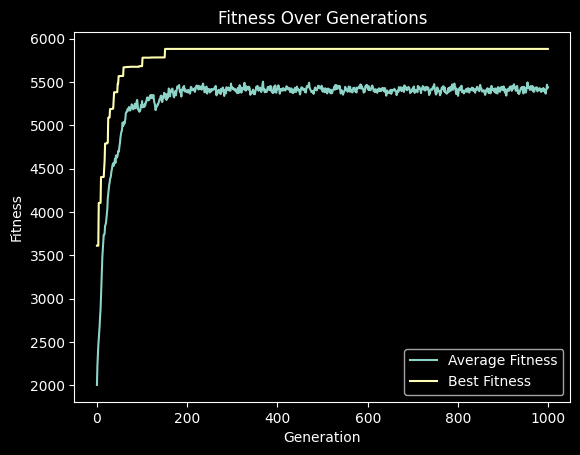

In [12]:
i = 0
avg_fitnesses = []
best_fitnesses = []
while i < NUM_GENERATIONS:
    next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, NUM_TIMESLOTS, ELITISM_PERCENTAGE)
    fitnesses = [check_solution(solution, student_matrix)[0] for solution in next_gen_population]
    avg_fitnesses.append(sum(fitnesses)/len(fitnesses))
    best_fitnesses.append(max(fitnesses))
    initial_population = next_gen_population
    i += 1

plt.plot(avg_fitnesses, label="Average Fitness")
plt.plot(best_fitnesses, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.legend()

In [13]:
best_idx = fitnesses.index(max(fitnesses))
best_fitness, hard_violations, soft_violations = check_solution(next_gen_population[best_idx], student_matrix)
print(f"Best Solution: {next_gen_population[best_idx]}")
print(f"Best Fitness: {best_fitness} | Hard Constraint Violations = {hard_violations} | Soft Constraint Violations = {soft_violations}")

Best Solution: [1, 6, 3, 0, 9, 9, 4, 2, 1, 3, 6, 0, 7, 8, 5, 4, 8, 3, 2, 2, 3, 5, 9, 7, 4]
Best Fitness: 5883 | Hard Constraint Violations = 0 | Soft Constraint Violations = 117


In [14]:
all_results = []
i = 0
while i < NUM_RUNS:
    best_solution, best_fitness, hard_violations, soft_violations, avg_fits, best_fits = run_ga(student_matrix, NUM_EXAMS, NUM_TIMESLOTS, POP_SIZE, TOURNAMENT_SIZE, NUM_GENERATIONS, CROSSOVER_RATE, MUTATION_RATE, ELITISM_PERCENTAGE)
    all_results.append((best_solution, best_fitness, hard_violations, soft_violations))
    print(f"Run {i + 1}: Best Fitness = {best_fitness} | Hard Constraint Violations = {hard_violations} | Soft Constraint Violations = {soft_violations}")
    i += 1

overall_best = max(all_results, key=lambda x: x[1])
print(f"\nBest Solution Across All Runs: {overall_best[0]}")
print(f"Best Fitness Across All Runs: {overall_best[1]}")
print(f"Hard Constraint Violations: {overall_best[2]}")
print(f"Soft Constraint Violations: {overall_best[3]}")

Run 10: Best Fitness = 5793 | Hard Constraint Violations = 1 | Soft Constraint Violations = 107

Best Solution Across All Runs: [4, 9, 6, 2, 8, 2, 7, 8, 4, 6, 9, 1, 3, 5, 0, 7, 1, 6, 5, 5, 7, 0, 9, 3, 8]
Best Fitness Across All Runs: 5899
Hard Constraint Violations: 0
Soft Constraint Violations: 101
